In [ ]:
##STEP 1 : LOAD Library

In [95]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [114]:
# Step 2: Import file
mydata2 = pd.read_excel('MMM_Blender_data_2.xlsx')

# adjust date format
mydata2["Date_adjust"] =pd.to_datetime(mydata2["Date"], format="%b-%Y")

In [115]:
mydata2

,Date,Sales ($),TV_ads ($),online_ads ($),Print_ads ($),Price ($),Date_adjust
0,Jan-2008,6237000,181222.548442,12152.540107,24986.912760,135.0,2008-01-01
1,Feb-2008,6115500,179104.353164,57353.376363,17574.385360,135.0,2008-02-01
2,Mar-2008,10577250,222756.223235,146794.245435,16016.022899,135.0,2008-03-01
3,Apr-2008,13473000,188266.818315,376459.468169,29689.694160,135.0,2008-04-01
4,May-2008,6258525,210038.289741,21297.573231,17606.991440,136.5,2008-05-01
...,...,...,...,...,...,...,...
145,Feb-2020,9486000,188038.562233,314738.939174,20633.865171,180.0,2020-02-01
146,Mar-2020,4230000,193748.973119,61583.121445,17514.258530,180.0,2020-03-01
147,Apr-2020,9504000,199048.223805,324562.541889,16122.631683,180.0,2020-04-01
148,May-2020,3861000,192013.052245,79169.843365,19993.295700,180.0,2020-05-01


In [116]:
# step 3 : Define X,y
X=mydata2[["Price ($)","TV_ads ($)","online_ads ($)","Print_ads ($)"]]
y=mydata2[["Sales ($)"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [117]:
#step 4: train with polynomial model with degree 1 2 3 4--to see if there are non linearity relationship
results = {}

for degree in [1,2, 3, 4, 5]:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_poly)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Save results
    results[degree] = {"MSE": mse, "R2": r2, "Num Features": X_train_poly.shape[1]}
    
    print(f"Degree {degree}: MSE = {mse:.2f}, R2 = {r2:.2f}, Features = {X_train_poly.shape[1]}")


Degree 1: MSE = 686455818378.26, R2 = 0.92, Features = 4
Degree 2: MSE = 280344644563.11, R2 = 0.97, Features = 14
Degree 3: MSE = 522906117702.83, R2 = 0.94, Features = 34
Degree 4: MSE = 1047742339702.16, R2 = 0.87, Features = 69
Degree 5: MSE = 28879084151431.80, R2 = -2.50, Features = 125


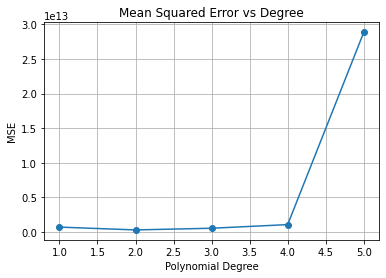

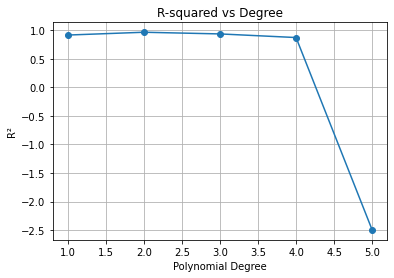

In [118]:
# 4.2 plot the chart
degrees = list(results.keys())
mse_values = [results[deg]["MSE"] for deg in degrees]
r2_values = [results[deg]["R2"] for deg in degrees]

# Plot MSE
plt.figure()
plt.plot(degrees, mse_values, marker='o')
plt.title("Mean Squared Error vs Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

# Plot R²
plt.figure()
plt.plot(degrees, r2_values, marker='o')
plt.title("R-squared vs Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("R²")
plt.grid(True)
plt.show()


In [109]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline
# from sklearn.linear_model import LinearRegression

# # Define pipeline with polynomial features and regression model
# from sklearn.model_selection import GridSearchCV
# param_grid = {'polynomialfeatures__degree': [2, 3, 4, 5]}
# pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())

# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# print("Best Degree:", grid_search.best_params_['polynomialfeatures__degree'])
# best_model = grid_search.best_estimator_



In [157]:
# step 5: find the optimzie alpha from ridge model to regularization 
from sklearn.model_selection import GridSearchCV

##when we use degree=2 for polynomial model 
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
     
    
# Define a range of alpha values
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Grid search with cross-validation
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly, y_train)

# Best alpha and best model
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")
best_model = grid_search.best_estimator_


# Predict with the best model
y_pred_best = best_model.predict(X_test_poly)

# Final evaluation
final_mse = mean_squared_error(y_test, y_pred_best)
final_r2 = r2_score(y_test, y_pred_best)

print(f"Final Mean Squared Error: {final_mse:.2f}")
print(f"Final R-squared: {final_r2:.2f}")

C:\Users\yu301\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.82471e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\yu301\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.47367e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\yu301\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.76297e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\yu301\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.046e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\yu301\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212:

Best Alpha: 100
Final Mean Squared Error: 278720984467.98
Final R-squared: 0.97


C:\Users\yu301\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.06683e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\yu301\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=8.05172e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\yu301\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.32611e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\yu301\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=7.69726e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\yu301\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:21

C:\Users\yu301\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.02628e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\yu301\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.03131e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\yu301\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.08168e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\yu301\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.5853e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\yu301\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212

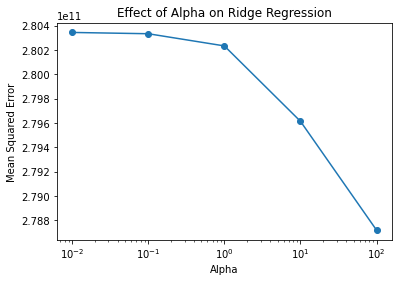

In [158]:
import matplotlib.pyplot as plt

alphas = [0.01, 0.1, 1, 10, 100]
mse_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_poly, y_train)
    y_pred = ridge.predict(X_test_poly)
    mse_scores.append(mean_squared_error(y_test, y_pred))

plt.plot(alphas, mse_scores, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Alpha on Ridge Regression')
plt.show()


In [138]:
##step 6: final model go with ridge model with variable of polynomical degree 2 

numpy.ndarray

In [159]:
# Generate polynomial features
degree = 2  # Adjust degree as needed
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit Ridge Regression to handle high-dimensional polynomial features
ridge = Ridge(alpha=100)  # Adjust alpha for regularization
ridge.fit(X_train_poly, y_train)

# Evaluate the model
y_pred_poly = ridge.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Degree {degree}: MSE = {mse_poly:.2f}, R2 = {r2_poly:.2f}")


Polynomial Degree 2: MSE = 278720984467.98, R2 = 0.97


C:\Users\yu301\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.62158e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [161]:
import pandas as pd

# Example coefficients (as NumPy array)
coefficients = ridge.coef_  # Replace this with your model's coefficients
feature_names = poly.get_feature_names_out(X.columns)  # Get feature names
coefficients = ridge.coef_.flatten()

# Create a DataFrame for coefficients
coefficients_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})
# Sort coefficients by their absolute values or values
coefficients_sorted = coefficients_df.sort_values(by="Coefficient", ascending=False)

# Display sorted coefficients
print(coefficients_sorted)



# . Interpretation of Results
# the target (Sales) is primarily influenced by Price, with less contribution from ad channels

#Ridge Regularization Shrinks Other Coefficients: 
# Ridge reduces the magnitude of coefficients for features with low explanatory power, leaving dominant predictors unaffected (or less affected).

                         Feature  Coefficient
0                      Price ($)  7433.599412
7        Price ($) Print_ads ($)     1.429218
5           Price ($) TV_ads ($)     0.657219
6       Price ($) online_ads ($)     0.201049
12  online_ads ($) Print_ads ($)     0.000175
8                   TV_ads ($)^2     0.000038
9      TV_ads ($) online_ads ($)     0.000037
11              online_ads ($)^2    -0.000045
10      TV_ads ($) Print_ads ($)    -0.000145
13               Print_ads ($)^2    -0.002525
2                 online_ads ($)    -2.326077
3                  Print_ads ($)   -26.889045
1                     TV_ads ($)   -63.227589
4                    Price ($)^2  -837.397220


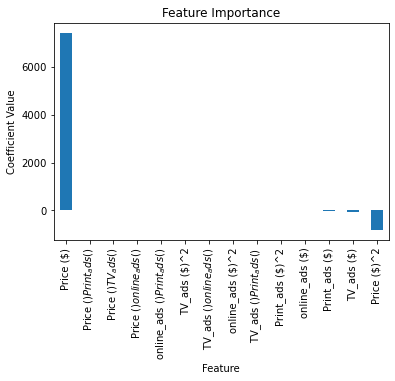

In [163]:
import matplotlib.pyplot as plt

coefficients_sorted.plot(
    kind="bar", x="Feature", y="Coefficient", legend=False, title="Feature Importance"
)
plt.ylabel("Coefficient Value")
plt.show()



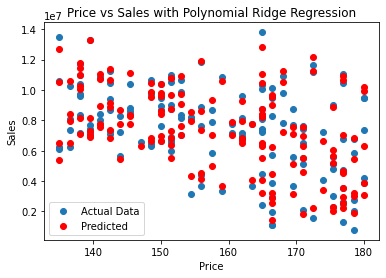

In [165]:
import matplotlib.pyplot as plt

plt.scatter(X["Price ($)"], y, label="Actual Data")
plt.scatter(X["Price ($)"], ridge.predict(poly.transform(X)), color="red", label="Predicted")
plt.xlabel("Price")
plt.ylabel("Sales")
plt.legend()
plt.title("Price vs Sales with Polynomial Ridge Regression")
plt.show()
